![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_lingual/multi_class_text_classification/NLU_training_multi_lingual_multi_class_text_classifier_demo_amazon.ipynb)




# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
## 3 class Amazon Phone review classifier training]
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


You can achieve these results or even better on this dataset with training data :

<br>


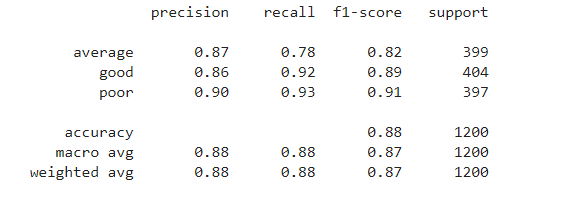



You can achieve these results or even better on this dataset with test data :

<br>

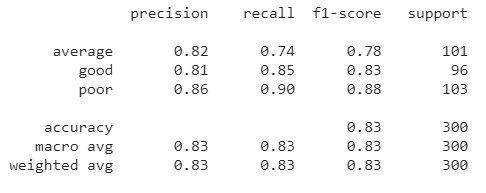

# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install  pyspark==2.4.7 
! pip install nlu > /dev/null    



import nlu

     |████████████████████████████████| 217.9MB 65kB/s 
     |████████████████████████████████| 204kB 17.4MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279465 sha256=0b2e93a0248005e8642f90e550b22eda27ab90e4b7c2bd16beeab6f4c8eb0550
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark


# 2. Download Amazon Unlocked mobile phones dataset 
https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

dataset with unlocked mobile phone reviews in 5 review classes


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/Amazon_Unlocked_Mobile_multi_lingual.csv

--2021-02-26 10:33:04--  http://ckl-it.de/wp-content/uploads/2021/02/Amazon_Unlocked_Mobile_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 511871 (500K) [text/csv]
Saving to: ‘Amazon_Unlocked_Mobile_multi_lingual.csv’

Amazon_Unlocked_Mob 100%[===================>] 499.87K   622KB/s    in 0.8s    

2021-02-26 10:33:05 (622 KB/s) - ‘Amazon_Unlocked_Mobile_multi_lingual.csv’ saved [511871/511871]



In [ ]:
import pandas as pd
test_path = '/content/Amazon_Unlocked_Mobile_multi_lingual.csv'
train_df = pd.read_csv(test_path,sep=",")
cols = ["y","text"]
train_df = train_df[cols]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df



,y,text
937,good,"Good phone, good qualty, the only that can bet..."
697,average,"Phone was unlocked, but didn't come in a box a..."
1014,average,The camera on this phone was foggy from the fi...
308,good,Like phone its nice for price sometimes it get...
971,good,Love it.
...,...,...
48,good,Gave the phone as a birthday gift. My friend s...
1174,average,No internet
1422,poor,I bought this phone to give as a gift to a fri...
873,poor,Phone would not turn on after charge all night


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.classifier')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['classifier_dl'].setMaxEpochs(60)  
trainable_pipe['classifier_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
              precision    recall  f1-score   support

     average       0.87      0.78      0.82       399
        good       0.86      0.92      0.89       404
        poor       0.90      0.93      0.91       397

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.87      1200
weighted avg       0.88      0.88      0.87      1200



,category,category_confidence,y,document,xx_embed_sentence_labse_embeddings,text
origin_index,,,,,,
937,good,0.997852,good,"Good phone, good qualty, the only that can bet...","[-0.04583406820893288, -0.02492734231054783, -...","Good phone, good qualty, the only that can bet..."
697,average,0.994527,average,"Phone was unlocked, but didn't come in a box a...","[-0.05288608372211456, 0.06084609776735306, -0...","Phone was unlocked, but didn't come in a box a..."
1014,poor,0.993759,average,The camera on this phone was foggy from the fi...,"[-0.007337542716413736, 0.06280891597270966, -...",The camera on this phone was foggy from the fi...
308,average,0.992863,good,Like phone its nice for price sometimes it get...,"[-0.05627260357141495, 0.020682260394096375, -...",Like phone its nice for price sometimes it get...
971,good,1.000000,good,Love it.,"[-0.008187997154891491, -0.06332288682460785, ...",Love it.
...,...,...,...,...,...,...
48,good,0.999999,good,Gave the phone as a birthday gift. My friend s...,"[0.02145097777247429, 0.023429783061146736, -0...",Gave the phone as a birthday gift. My friend s...
1174,poor,0.999460,average,No internet,"[-0.03171629458665848, -0.048338472843170166, ...",No internet
1422,poor,0.999944,poor,I bought this phone to give as a gift to a fri...,"[-0.05380842089653015, 0.04326845705509186, -0...",I bought this phone to give as a gift to a fri...


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))

              precision    recall  f1-score   support

     average       0.82      0.74      0.78       101
        good       0.81      0.85      0.83        96
        poor       0.86      0.90      0.88       103

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



#4. Test Model  with  20 languages!

In [ ]:
train_df = pd.read_csv("Amazon_Unlocked_Mobile_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))

preds

              precision    recall  f1-score   support

     average       0.63      0.76      0.69        29
        good       0.88      0.88      0.88        32
        poor       0.88      0.74      0.81        39

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.81      0.79      0.79       100



,category_confidence,category,xx_embed_sentence_labse_embeddings,document,y,text
origin_index,,,,,,
0,0.999397,poor,"[0.023933328688144684, 0.03197603300213814, -0...","Alındı, onu yandırdı, işləmədi. Geri açıldı, b...",poor,"Alındı, onu yandırdı, işləmədi. Geri açıldı, b..."
1,0.999097,average,"[-0.019562775269150734, -0.036460112780332565,...","דערווייַל עס איז 2014, די 3gs איז דיסקאַנטיניו...",average,"דערווייַל עס איז 2014, די 3gs איז דיסקאַנטיניו..."
2,0.999882,good,"[0.02229706011712551, -0.03892051428556442, -0...",100% recommended,good,100% recommended
3,0.999841,good,"[0.02347300760447979, -0.0566491037607193, 0.0...",Đó là một chiếc điện thoại tốt nhưng nếu bạn s...,average,Đó là một chiếc điện thoại tốt nhưng nếu bạn s...
4,0.999962,average,"[-0.04908802732825279, 0.006140722427517176, -...",វាល្អដែលទូរស័ព្ទនេះមានប្រព័ន្ធ LTE ហើយវាដំណើរក...,average,វាល្អដែលទូរស័ព្ទនេះមានប្រព័ន្ធ LTE ហើយវាដំណើរក...
...,...,...,...,...,...,...
95,0.999811,poor,"[-0.055938538163900375, 0.049839287996292114, ...","העלא, מיר געקויפט צוויי פאָנעס און זיי געקומען...",poor,"העלא, מיר געקויפט צוויי פאָנעס און זיי געקומען..."
96,1.000000,good,"[0.017209621146321297, 0.013231038115918636, -...",Uitstekend,good,Uitstekend
97,0.998939,average,"[-0.04478548839688301, 0.037118781358003616, -...",پروڈکٹ اچھی ہے لیکن انگریزی زبان میں اب بھی چی...,poor,پروڈکٹ اچھی ہے لیکن انگریزی زبان میں اب بھی چی...


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("It was like brand new ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999587,It was like brand new,"[0.024492498487234116, -0.003671384882181883, ..."


In [ ]:
fitted_pipe.predict("It stopped working on the first day ")


,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999982,It stopped working on the first day,"[-0.004823732189834118, 0.020508425310254097, ..."


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for: 'It worked perfectly '
fitted_pipe.predict("Es hat perfekt funktioniert")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999932,Es hat perfekt funktioniert,"[-0.0051118237897753716, -0.048203449696302414..."


In [ ]:
# German for: 'It stopped working on the first day'
fitted_pipe.predict("Am ersten Tag hörte es auf zu arbeiten ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.997735,Am ersten Tag hörte es auf zu arbeiten,"[0.020860085263848305, -0.011390600353479385, ..."


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: 'It was like brand new'
fitted_pipe.predict("就像全新 ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999987,就像全新,"[-0.01862957887351513, -0.02357419952750206, -..."


In [ ]:
# Chinese for: 'It stopped working on the first day'
fitted_pipe.predict("第一天停止工作 ")
		

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999527,第一天停止工作,"[-0.002283927286043763, 0.012262673117220402, ..."


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:

#  Afrikaans for: 'It worked perfectly '
fitted_pipe.predict("Dit het perfek gewerk")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.992191,Dit het perfek gewerk,"[-0.0018796967342495918, -0.043611422181129456..."


In [ ]:
#  Afrikaans for: 'It stopped working on the first day'
fitted_pipe.predict("Dit het op die eerste dag opgehou werk ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999818,Dit het op die eerste dag opgehou werk,"[0.00801787432283163, -0.013427305966615677, -..."


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
#  Zulu for: 'It worked perfectly '
fitted_pipe.predict("Kusebenze ngokuphelele")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.998644,Kusebenze ngokuphelele,"[0.010045883245766163, -0.051708437502384186, ..."


In [ ]:
#  Zulu for: 'It stopped working on the first day'
fitted_pipe.predict("Iyeke ukusebenza ngosuku lokuqala ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.996274,Iyeke ukusebenza ngosuku lokuqala,"[0.004491214174777269, 0.01870339922606945, 0...."


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:

#  Turkish for: 'It It worked perfectly '
fitted_pipe.predict("Mükemmel çalıştı")
		

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999999,Mükemmel çalıştı,"[0.06036875769495964, 0.0009111057734116912, -..."


In [ ]:

#  Turkish for: 'It stopped working on the first day'
fitted_pipe.predict("İlk gün çalışmayı bıraktı ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.997740,İlk gün çalışmayı bıraktı,"[0.05094106122851372, 0.02071293629705906, 0.0..."


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for: 'It worked perfectly '
fitted_pipe.predict("זה עבד בצורה מושלמת")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.997647,זה עבד בצורה מושלמת,"[-0.013386869803071022, -0.05498736351728439, ..."


In [ ]:
		
# Hebrew for: 'It stopped working on the first day'
fitted_pipe.predict("זה הפסיק לעבוד ביום הראשון ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999990,זה הפסיק לעבוד ביום הראשון,"[-0.013081037439405918, -0.02689044177532196, ..."


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
		
# Telugu for: 'It was like brand new'
fitted_pipe.predict("ఇది సరికొత్తది ")
		

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.992611,ఇది సరికొత్తది,"[0.0202536229044199, -0.04585985466837883, -0...."


In [ ]:

# Telugu for: 'It stopped working on the first day'
fitted_pipe.predict("ఇది మొదటి రోజు పనిచేయడం మానేసింది ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999991,ఇది మొదటి రోజు పనిచేయడం మానేసింది,"[0.0002221895701950416, -0.018764713779091835,..."


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
		
#  Russian for: 'It stopped working on the first day'
fitted_pipe.predict("Перестал работать в первый же день ")
		

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999996,Это сработало отлично,"[0.008218087255954742, -0.05058329179883003, -..."


In [ ]:
#  Russian for: 'It worked perfectly '
fitted_pipe.predict("Это сработало отлично")


,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999996,Это сработало отлично,"[0.008218087255954742, -0.05058329179883003, -..."


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
# Urdu for: 'It was the best ever!'
fitted_pipe.predict("یہ اب تک کا سب سے اچھا تھا!")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999999,یہ اب تک کا سب سے اچھا تھا!,"[0.030929533764719963, -0.05265289545059204, -..."


In [ ]:
# Urdu for: 'It stopped working on the first day'
fitted_pipe.predict("اس نے پہلے دن کام کرنا چھوڑ دیا ")
		

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.866228,یہ بالکل کام کیا,"[0.03534713014960289, -0.06895627826452255, -0..."


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# hindi for: 'It was the best ever !!'
fitted_pipe.predict("यह सबसे अच्छा कभी था !!")
		

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999092,यह सबसे अच्छा कभी था !!,"[0.002181761898100376, -0.05553552508354187, -..."


In [ ]:
# hindi for: 'It stopped working on the first day'
fitted_pipe.predict("इसने पहले दिन काम करना बंद कर दिया ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999991,इसने पहले दिन काम करना बंद कर दिया,"[0.009801734238862991, -0.026267804205417633, ..."


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: 'It was It was the best ever !!'
fitted_pipe.predict("Бу иң яхшысы иде !! ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999988,Бу иң яхшысы иде !!,"[0.03979770094156265, -0.05419746786355972, -0..."


In [ ]:
# Tartar for: 'It stopped working on the first day'
fitted_pipe.predict("Беренче көнне эшләүне туктатты ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999926,Беренче көнне эшләүне туктатты,"[0.030974868685007095, 0.03395547345280647, 0...."


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for: 'It was the best ever !!'
fitted_pipe.predict("C'était la meilleure chose que je n'ai jamais faite !!")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.998638,C'était la meilleure chose que je n'ai jamais ...,"[0.02751990035176277, -0.047827284783124924, -..."


In [ ]:
		
# French for: 'It stopped working on the first day'
fitted_pipe.predict("Il a cessé de fonctionner le premier jour ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999981,Il a cessé de fonctionner le premier jour,"[-0.027476917952299118, -0.006572211626917124,..."


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
# Thai for: 'It was the best ever !!'
fitted_pipe.predict("มันดีที่สุดเท่าที่เคยมีมา !!")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,1.000000,มันดีที่สุดเท่าที่เคยมีมา !!,"[-0.00953331496566534, -0.05253230035305023, -..."


In [ ]:
# Thai for: 'It stopped working on the first day'
fitted_pipe.predict("มันหยุดทำงานในวันแรก ")
		

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999795,มันหยุดทำงานในวันแรก,"[-0.028285449370741844, -0.02508157305419445, ..."


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:

# Khmer for: 'It was like brand new'
fitted_pipe.predict("វាដូចជាម៉ាកថ្មី ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999677,វាដូចជាម៉ាកថ្មី,"[-0.013914551585912704, 0.011598535813391209, ..."


In [ ]:
		
# Khmer for: 'It stopped working on the first day'
fitted_pipe.predict("វាឈប់ធ្វើការនៅថ្ងៃដំបូង ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999771,វាឈប់ធ្វើការនៅថ្ងៃដំបូង,"[-0.012111756019294262, -0.025659380480647087,..."


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
# Yiddish for: 'It was the best ever !!'
fitted_pipe.predict("עס איז געווען דער בעסטער טאָמיד !!")
		

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999999,עס איז געווען דער בעסטער טאָמיד !!,"[0.01722850650548935, -0.04829198867082596, -0..."


In [ ]:
# Yiddish for: 'It stopped working on the first day'
fitted_pipe.predict("אויף דער ערשטער טאָג עס סטאַפּט ארבעטן ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999583,אויף דער ערשטער טאָג עס סטאַפּט ארבעטן,"[-0.03324508294463158, -0.02061191014945507, 0..."


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
		
# Kygrgyz for: 'It was the best ever !!'
fitted_pipe.predict("Бул эң мыкты болду !!")
		

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,1.000000,Бул эң мыкты болду !!,"[0.036575060337781906, -0.056231312453746796, ..."


In [ ]:

# Kygrgyz for: 'It stopped working on the first day'
fitted_pipe.predict("Биринчи күнү эле иштебей калды ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999976,Биринчи күнү эле иштебей калды,"[0.012193235568702221, 0.014580748975276947, -..."


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for: 'It was the best ever !!'
fitted_pipe.predict("இது எப்போதும் சிறந்தது !! ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,1.000000,இது எப்போதும் சிறந்தது !!,"[-0.030394665896892548, -0.058778341859579086,..."


In [ ]:
		
# Tamil for: 'It stopped working on the first day'
fitted_pipe.predict("இது முதல் நாளில் வேலை செய்வதை நிறுத்தியது ")

,category,category_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,poor,0.999954,இது முதல் நாளில் வேலை செய்வதை நிறுத்தியது,"[0.02203391306102276, -0.009059661068022251, 0..."


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained'
hdd_pipe = nlu.load(path=stored_model_path)
preds = hdd_pipe.predict('It worked perfectly.')
preds

,classifier,classifier_confidence,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,good,0.999984,It worked perfectly.,"[0.006914846133440733, -0.04569808393716812, -..."


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')            | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector'] has settable params:
pipe['sentence_detector'].setCustomBounds([])                  | Info: characters used to explicitly mark sentence bounds | Currently set to : []
pipe['sentence_detector'].setDetectLists(True)                 | Info: whether detect lists during sentence detection | Currently set to : True
pipe['sentence_detector'].setExplodeSentences(False)           | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector'].setMaxLength(99999)                  | Info: Set the maximum allowed length for ea